In [1]:

# Import necessary libraries
import numpy as np
from itertools import izip  # For Python 2 compatibility, use `zip` if on Python 3
import os

# Configurations (modify as needed)
class Config:
    validation_fraction = 0.2  # Fraction of data used for validation
    batch_size = 32  # Batch size

config = Config()

# Define data path
data_path = 'data/data_v2'
assert os.path.exists(data_path), "Data path does not exist!"


In [2]:

# Load data from the specified path
with open(data_path, 'r') as f:
    data = f.read()

# Split the data into tokens and initialize the token set
tokens_set = set(data.split())
start_symbol, end_symbol = '<s>', '</s>'
tokens_set.update({start_symbol, end_symbol})

# Create vocabulary mappings
idx2token = list(tokens_set)
vocab_size = len(idx2token)
print('Vocabulary size:', vocab_size)
token2idx = dict(izip(idx2token, range(vocab_size)))  # Use zip for Python 3


('Vocabulary size:', 137)


In [3]:

# Process the tunes and tokenize them
tunes = data.split('\n\n')
del data  # Free up memory

tunes = [
    [token2idx[c] for c in [start_symbol] + t.split() + [end_symbol]]
    for t in tunes
]

# Sort tunes by length (longest first)
tunes.sort(key=lambda x: len(x), reverse=True)
ntunes = len(tunes)
print('Number of tunes:', ntunes)


('Number of tunes:', 23636)


In [12]:
display(tunes[0])

[80,
 104,
 86,
 69,
 73,
 48,
 88,
 48,
 81,
 69,
 73,
 23,
 88,
 23,
 81,
 73,
 70,
 53,
 90,
 71,
 38,
 71,
 71,
 71,
 126,
 49,
 71,
 113,
 53,
 65,
 113,
 71,
 49,
 126,
 71,
 49,
 126,
 53,
 94,
 49,
 38,
 49,
 49,
 49,
 94,
 126,
 49,
 71,
 53,
 88,
 71,
 49,
 126,
 94,
 73,
 122,
 70,
 53,
 90,
 71,
 38,
 71,
 71,
 71,
 126,
 49,
 71,
 113,
 53,
 65,
 113,
 71,
 49,
 126,
 71,
 49,
 126,
 53,
 94,
 126,
 94,
 73,
 38,
 122,
 70,
 90,
 70,
 122,
 53,
 73,
 94,
 126,
 49,
 71,
 53,
 73,
 122,
 70,
 53,
 90,
 71,
 38,
 71,
 71,
 71,
 126,
 49,
 71,
 113,
 53,
 65,
 113,
 71,
 49,
 126,
 71,
 49,
 126,
 53,
 94,
 49,
 126,
 94,
 73,
 126,
 94,
 73,
 53,
 122,
 94,
 73,
 122,
 70,
 73,
 122,
 70,
 53,
 90,
 71,
 38,
 71,
 71,
 71,
 126,
 49,
 71,
 113,
 53,
 65,
 113,
 71,
 49,
 126,
 71,
 49,
 126,
 53,
 94,
 126,
 94,
 73,
 38,
 122,
 70,
 90,
 70,
 122,
 53,
 73,
 94,
 126,
 49,
 71,
 53,
 88,
 71,
 49,
 53,
 126,
 71,
 38,
 71,
 71,
 71,
 122,
 71,
 73,
 71,
 53,
 126,
 73,
 71,

In [4]:

# Calculate tune lengths
tune_lens = np.array([len(t) for t in tunes])
max_len = max(tune_lens)
print('Max tune length:', max_len)

# Calculate the number of validation tunes
nvalid_tunes = ntunes * config.validation_fraction
nvalid_tunes = config.batch_size * max(
    1, int(round(nvalid_tunes / float(config.batch_size)))
)  # Round to a multiple of batch_size
print('Number of validation tunes:', nvalid_tunes)

# Split into training and validation sets
rng = np.random.RandomState(42)  # Fixed seed for reproducibility
valid_idxs = rng.choice(np.arange(ntunes), int(nvalid_tunes), replace=False)

# Create validation and training datasets
valid_tunes = [tunes[i] for i in valid_idxs]
train_tunes = [tunes[i] for i in range(ntunes) if i not in valid_idxs]

print('Training tunes:', len(train_tunes))
print('Validation tunes:', len(valid_tunes))


('Max tune length:', 1954)
('Number of validation tunes:', 4736)
('Training tunes:', 18900)
('Validation tunes:', 4736)


,Tune Index,Tune Length
count,23636.000000,23636.000000
mean,11817.500000,172.607971
std,6823.269817,87.047559
min,0.000000,48.000000
25%,5908.750000,123.000000
50%,11817.500000,152.000000
75%,17726.250000,192.000000
max,23635.000000,1954.000000


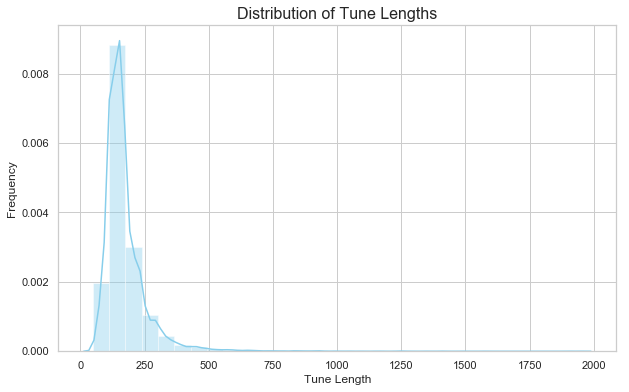

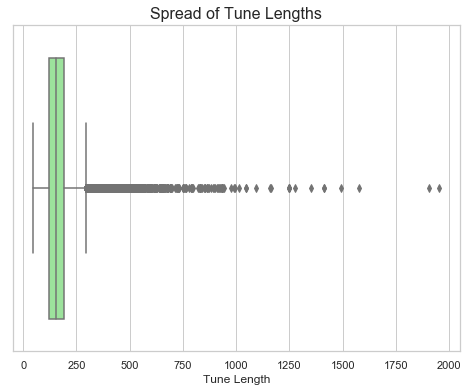

,Frequency
|,422870
c,365126
G,325349
2,311008
E,237986
d,218884
C,214315
e,201511
D,178096
B,177413


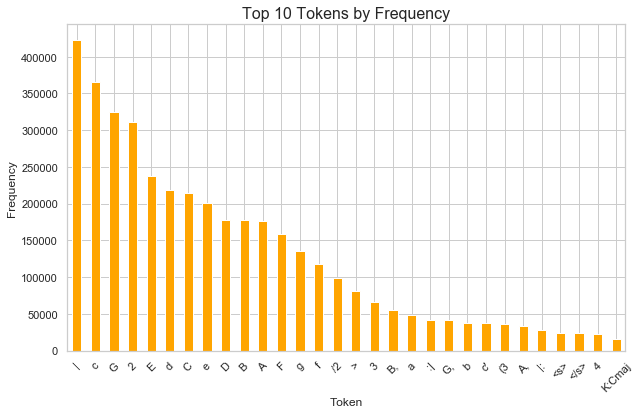

In [19]:

# Visualization imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set up plot styles
sns.set(style="whitegrid")

# Prepare a pandas DataFrame for tune lengths
tune_stats = pd.DataFrame({
    'Tune Length': tune_lens,
    'Tune Index': range(len(tune_lens))
})

# Display basic statistics in a DataFrame
display(tune_stats.describe())

# Plot a histogram of tune lengths
plt.figure(figsize=(10, 6))
sns.distplot(tune_stats['Tune Length'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Tune Lengths", fontsize=16)
plt.xlabel("Tune Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Plot a box plot for tune lengths
plt.figure(figsize=(8, 6))
sns.boxplot(x=tune_stats['Tune Length'], color='lightgreen')
plt.title("Spread of Tune Lengths", fontsize=16)
plt.xlabel("Tune Length", fontsize=12)
plt.show()

# Token frequency analysis
token_freq = pd.Series(data=0, index=idx2token)
for tune in tunes:
    for idx in tune:
        token_freq[idx2token[idx]] += 1

# Display top 10 tokens in a DataFrame
top_tokens = token_freq.sort_values(ascending=False).head(30)
display(pd.DataFrame(top_tokens, columns=['Frequency']))

# Bar chart of top 10 tokens
plt.figure(figsize=(10, 6))
top_tokens.plot(kind='bar', color='orange')
plt.title("Top 10 Tokens by Frequency", fontsize=16)
plt.xlabel("Token", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [18]:
display(tune_stats.head(10))

,Tune Index,Tune Length
0,0,1954
1,1,1907
2,2,1578
3,3,1491
4,4,1412
5,5,1411
6,6,1351
7,7,1277
8,8,1249
9,9,1247


### Shows what the output looks like


In [17]:
# Import necessary libraries
import pickle
import pandas as pd

# Specify the path to your .pkl file
pkl_file_path = 'metadata/folkrnn_v2.pkl'

# Load the pickle file
with open(pkl_file_path, 'rb') as file:
    data = pickle.load(file)

display(data)


{'configuration': 'config5',
 'epoch_since_start': 99,
 'experiment_id': 'config5-wrepeats-20160112-222521',
 'iters_since_start': 35101,
 'learning_rate': array(0.00027045, dtype=float32),
 'losses_eval_valid': [430.21062554253473,
  282.98174964057074,
  256.77491505940753,
  245.34471215142145,
  235.6263673570421,
  229.53178236219617,
  226.10265011257596,
  222.2268549601237,
  219.69361877441406,
  217.70301225450305,
  215.9916729397244,
  213.80305820041232,
  213.13499450683594,
  213.6894268459744,
  212.33266109890408,
  216.48762808905707,
  210.33165486653647,
  210.42872958713107,
  210.35541237725153,
  212.16788821750217,
  212.01054890950522,
  210.45019658406576,
  210.52352227105035,
  209.59689712524414,
  209.1461092631022,
  209.3853679233127,
  212.99689737955728,
  212.563235812717,
  209.65189954969617,
  211.93977483113608,
  211.009701622857,
  212.7895999484592,
  211.70873175726996,
  211.84649107191296,
  213.42246585422092],
 'losses_train': [array(1840.